In [ ]:
#installing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving crop_yield.csv to crop_yield.csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['crop_yield.csv']))
df.head()


,soil_quality,rainfall,seed_type,yield_category
0,5.787214,376.596391,C,low
1,2.222101,787.223810,A,low
2,1.893720,810.077116,A,medium
3,2.879777,943.405918,C,medium
4,9.330736,224.439566,C,medium


Shape: (100, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   soil_quality    100 non-null    float64
 1   rainfall        100 non-null    float64
 2   seed_type       100 non-null    object 
 3   yield_category  100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.3+ KB
None

Missing Values:
 soil_quality      0
rainfall          0
seed_type         0
yield_category    0
dtype: int64

Yield Category Distribution:
yield_category
low       37
high      34
medium    29
Name: count, dtype: int64


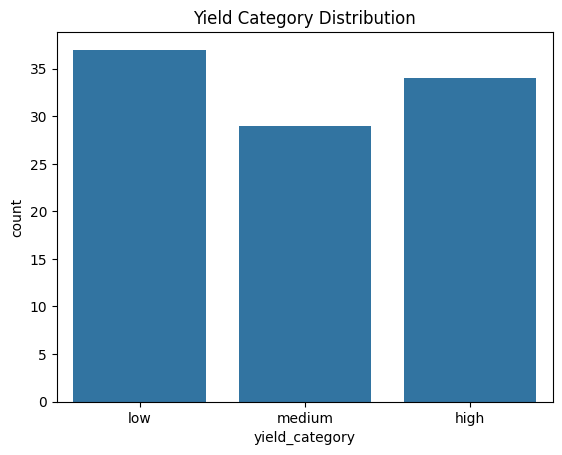

In [ ]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Value counts of the target variable
print("\nYield Category Distribution:")
print(df['yield_category'].value_counts())

# Plot distribution of target
sns.countplot(data=df, x='yield_category')
plt.title("Yield Category Distribution")
plt.show()


In [ ]:
# Encode seed_type (input) and yield_category (target)
le_seed = LabelEncoder()
df['seed_type_encoded'] = le_seed.fit_transform(df['seed_type'])

le_yield = LabelEncoder()
df['yield_encoded'] = le_yield.fit_transform(df['yield_category'])

df[['seed_type', 'seed_type_encoded', 'yield_category', 'yield_encoded']].head()


,seed_type,seed_type_encoded,yield_category,yield_encoded
0,C,2,low,1
1,A,0,low,1
2,A,0,medium,2
3,C,2,medium,2
4,C,2,medium,2


In [ ]:
# Define input features and target
X = df[['soil_quality', 'rainfall', 'seed_type_encoded']]
y = df['yield_encoded']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


✅ Accuracy Score: 0.45

Classification Report:
               precision    recall  f1-score   support

        high       0.50      0.50      0.50         8
         low       0.40      0.80      0.53         5
      medium       0.50      0.14      0.22         7

    accuracy                           0.45        20
   macro avg       0.47      0.48      0.42        20
weighted avg       0.47      0.45      0.41        20



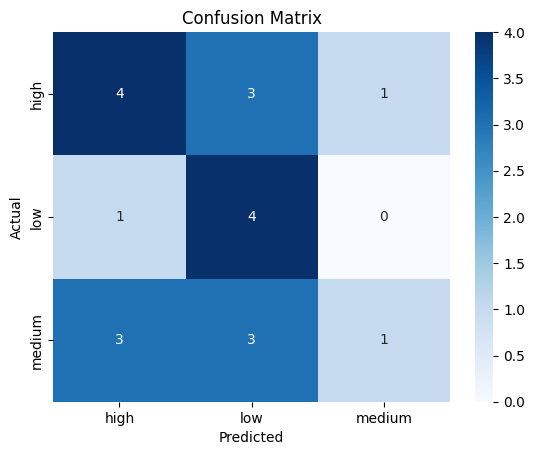

In [ ]:
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_yield.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_yield.classes_, yticklabels=le_yield.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
X_clustering = df[['soil_quality', 'rainfall', 'seed_type_encoded']]
X_clustering_scaled = scaler.fit_transform(X_clustering)

# KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_clustering_scaled)

df['cluster'] = clusters


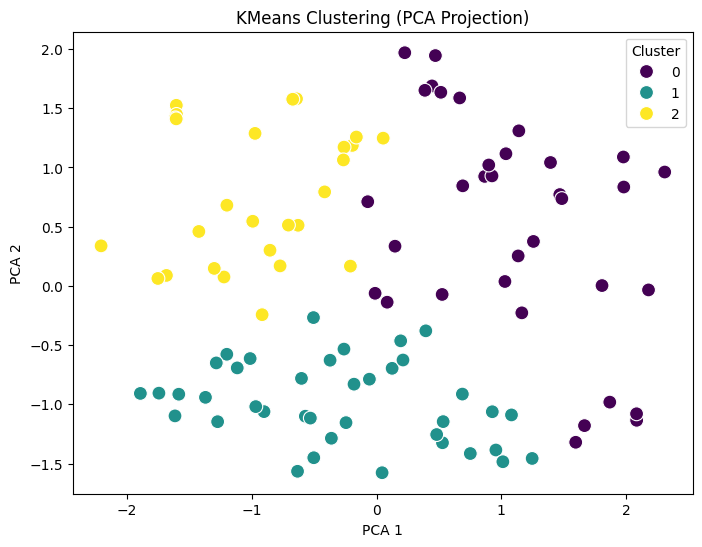

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='viridis', s=100)
plt.title('KMeans Clustering (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


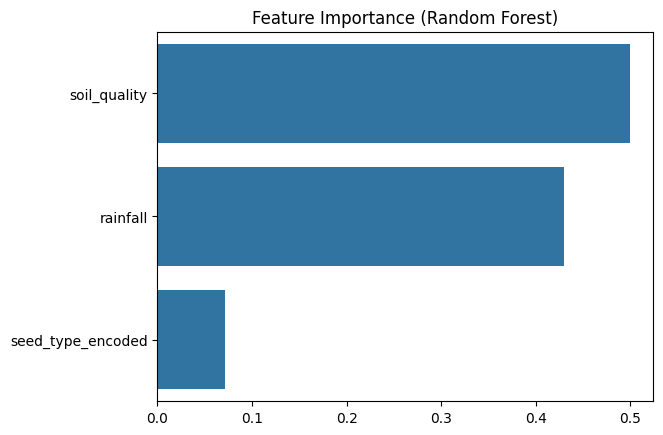

In [ ]:
importances = clf.feature_importances_
feature_names = ['soil_quality', 'rainfall', 'seed_type_encoded']

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()


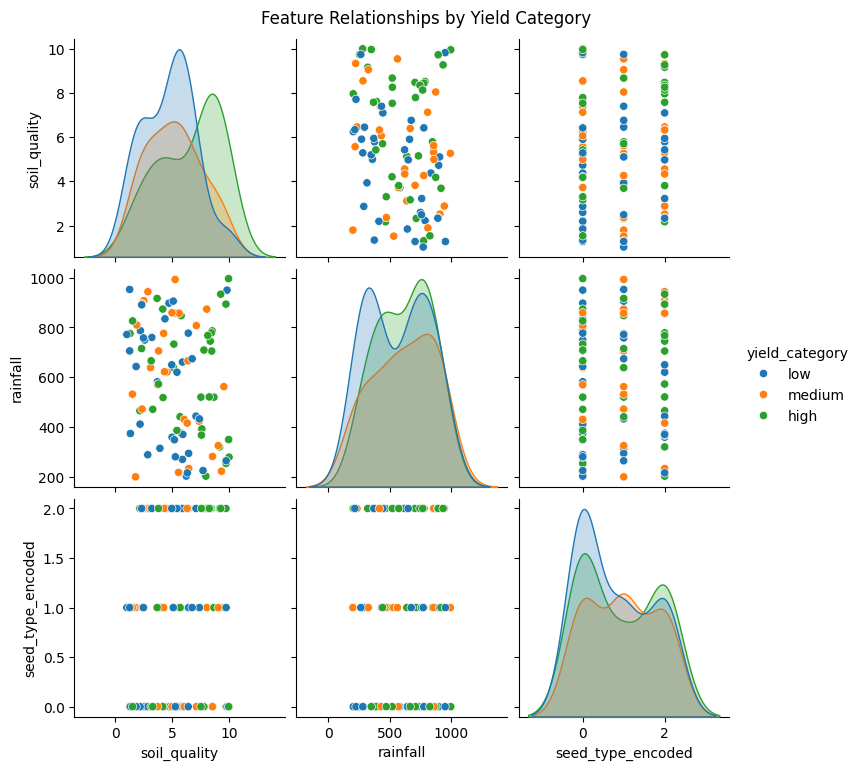

In [ ]:
sns.pairplot(df[['soil_quality', 'rainfall', 'seed_type_encoded', 'yield_category']], hue='yield_category')
plt.suptitle("Feature Relationships by Yield Category", y=1.02)
plt.show()
